In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

In [74]:
plt.style.use('fivethirtyeight') 

In [75]:
orders = pd.read_csv("data/orders.csv", dayfirst=True, header=1)
process = pd.read_csv("data/order-process.csv", dayfirst=True,)
intern = pd.read_csv("data/intern.csv", dayfirst=True,)
campaign = pd.read_csv("data/campaign.csv", dayfirst=True,)
orders.head()
process.head()
# intern.head()
# campaign.head()
campaign.shape


(333, 3)

In [76]:
# lowercasing the titles
orders.rename(columns=lambda x : x.lower(), inplace=True)
process.rename(columns=lambda x : x.lower(), inplace=True)
intern.rename(columns=lambda x : x.lower(), inplace=True)
campaign.rename(columns=lambda x : x.lower(), inplace=True)
campaign.head()

,order id,arrival scan date,customer name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly


In [77]:
# replacing spaces with '_':
orders.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
intern.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
process.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
campaign.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)


In [78]:
# to change the day formatting

intern['ready_to_ship_date'] = pd.to_datetime(intern['ready_to_ship_date'], format='%d/%m/%Y')
intern['pickup_date'] = pd.to_datetime(intern['pickup_date'], format='%d/%m/%Y')
intern.head()
orders['order_date'] = pd.to_datetime(orders['order_date'], format='%d/%m/%Y')
orders_clean = orders[['index','order_id', 'order_date', 'postal_code', 'state']]
orders_clean.head()



,index,order_id,order_date,postal_code,state
0,27,CA-2019-121755,2019-01-16,90049.0,California
1,45,CA-2019-118255,2019-03-11,55122.0,Minnesota
2,48,CA-2019-169194,2019-06-20,19901.0,Delaware
3,60,CA-2019-111682,2019-06-17,12180.0,New York
4,63,CA-2018-135545,2018-11-24,90004.0,California


In [79]:
campaign['arrival_scan_date'] = pd.to_datetime(campaign['arrival_scan_date'], format='%d/%m/%Y')
campaign.head()
process['order_date'] = pd.to_datetime(process['order_date'], dayfirst=True)
process['on_truck_scan_date'] = pd.to_datetime(process['on_truck_scan_date'], dayfirst=True)
process.head(20)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
5,8606,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
6,9494,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing
7,9495,CA-2019-105207,2019-01-03,2019-01-09,Standard Processing
8,5868,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing
9,5869,CA-2019-158211,2019-01-04,2019-01-09,Standard Processing


In [80]:
#to remove duplicates in intern data
intern[intern.duplicated(keep=False)].sort_values(by='order_id')
intern_cleaned = intern.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
#to merge non-duplicated intern with orders
orders_intern = pd.merge(orders_clean, intern_cleaned)
orders_intern[orders_intern.duplicated(keep=False)].sort_values(by='order_id')





,index,order_id,order_date,postal_code,state,ready_to_ship_date,pickup_date


In [81]:
# to merge orders and process
orders_process = pd.merge(orders_clean, process, on='order_id')
orders_process


,index,order_id,order_date_x,postal_code,state,row_id,order_date_y,on_truck_scan_date,ship_mode
0,27,CA-2019-121755,2019-01-16,90049.0,California,26,2019-01-16,2019-01-23,Standard Processing
1,27,CA-2019-121755,2019-01-16,90049.0,California,27,2019-01-16,2019-01-23,Standard Processing
2,26,CA-2019-121755,2019-01-16,90049.0,California,26,2019-01-16,2019-01-23,Standard Processing
3,26,CA-2019-121755,2019-01-16,90049.0,California,27,2019-01-16,2019-01-23,Standard Processing
4,45,CA-2019-118255,2019-03-11,55122.0,Minnesota,45,2019-03-11,2019-03-13,Express
...,...,...,...,...,...,...,...,...,...
17520,9463,US-2020-109610,2020-11-25,40214.0,Kentucky,9463,2020-11-25,2020-12-02,Standard Processing
17521,9760,CA-2019-146913,2019-10-31,94109.0,California,9760,2019-10-31,2019-11-06,Standard Processing
17522,9808,CA-2020-107209,2020-07-27,27604.0,North Carolina,9808,2020-07-27,2020-08-05,Standard Processing
17523,9830,US-2020-152842,2020-07-16,28205.0,North Carolina,9830,2020-07-16,2020-07-24,Standard Processing


In [153]:
#to merge orders and campaign
orders_campaign = pd.merge(orders_clean, campaign)
orders_campaign['order_arrival_diff'] = orders_campaign['arrival_scan_date'] - orders_campaign['order_date']
orders_campaign.drop(columns='index', inplace = True)
orders_campaign.head()

orders_campaign[orders_campaign.duplicated(keep=False)].sort_values(by='order_id')
orders_campaign.drop_duplicates(subset=None, keep='first', inplace=True)

orders_campaign.drop(columns='customer_name', inplace=True)
# orders.query('order_id == "CA-2019-145625"')
orders_campaign['is_delayed'] = np.where(orders_campaign['order_arrival_diff'].map(lambda x: x.days) > 9, 'yes', 'no')
orders_campaign['is_delayed'].value_counts()
orders_campaign



,order_id,order_date,postal_code,state,arrival_scan_date,order_arrival_diff,is_delayed
0,CA-2019-145625,2019-09-11,92037.0,California,2019-09-23,12 days,yes
2,CA-2019-162138,2019-04-23,92345.0,California,2019-05-06,13 days,yes
4,CA-2019-169166,2019-05-09,98115.0,Washington,2019-05-20,11 days,yes
5,CA-2020-131954,2020-01-21,98115.0,Washington,2020-02-03,13 days,yes
11,CA-2019-102981,2019-09-06,10035.0,New York,2019-09-16,10 days,yes
...,...,...,...,...,...,...,...
663,CA-2020-135076,2020-04-13,92345.0,California,2020-04-27,14 days,yes
664,CA-2019-109400,2019-05-02,79109.0,Texas,2019-05-13,11 days,yes
665,CA-2019-113341,2019-11-25,90032.0,California,2019-12-09,14 days,yes
666,CA-2019-162159,2019-09-16,31907.0,Georgia,2019-09-23,7 days,no


In [149]:
# to merge intern and orders
order_intern = pd.merge(intern_cleaned, orders_clean)
#to create a new column as ready_to_ship_length
order_intern['ready_to_ship_length'] = order_intern['ready_to_ship_date'] - order_intern['order_date']
# order_intern.sort_values(by='ready_to_ship_length')
order_intern.groupby('ready_to_ship_length').count()
# order_intern['ready_to_ship_length'].count()
order_intern






,order_id,ready_to_ship_date,pickup_date,index,order_date,postal_code,state,ready_to_ship_length
0,CA-2019-116540,2019-09-02,2019-09-03,3416,2019-09-02,53711.0,Wisconsin,0 days
1,CA-2019-116540,2019-09-02,2019-09-03,3417,2019-09-02,53711.0,Wisconsin,0 days
2,CA-2019-129847,2019-09-04,2019-09-04,6937,2019-09-02,60653.0,Illinois,2 days
3,CA-2019-129630,2019-09-04,2019-09-04,9930,2019-09-04,94122.0,California,0 days
4,CA-2019-129630,2019-09-04,2019-09-04,9929,2019-09-04,94122.0,California,0 days
...,...,...,...,...,...,...,...,...
413,CA-2020-105333,2020-12-04,2020-12-07,5585,2020-11-30,10011.0,New York,4 days
414,CA-2020-105333,2020-12-04,2020-12-07,5587,2020-11-30,10011.0,New York,4 days
415,CA-2020-119305,2020-12-04,2020-12-07,956,2020-11-30,39212.0,Mississippi,4 days
416,CA-2020-142090,2020-12-07,2020-12-09,5066,2020-11-30,27217.0,North Carolina,7 days


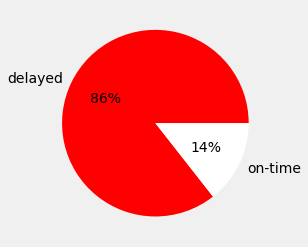

In [150]:
# sns.countplot(x=orders_campaign['is_delayed'])
plt.pie(orders_campaign['is_delayed'].value_counts(), labels=['delayed', 'on-time'], colors=['red', 'white'], autopct='%.0f%%');

In [84]:
# order_intern['ready_to_ship_length'] = order_intern['ready_to_ship_length'].apply(lambda x: x.value)

In [152]:
# order_intern['ready_to_ship_length'] = order_intern['ready_to_ship_length']
order_intern['is_delayed'] = np.where(order_intern['ready_to_ship_length'] > 4, 'yes', 'no')
order_intern

TypeError: Invalid comparison between dtype=timedelta64[ns] and int

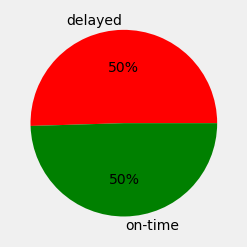

In [110]:
plt.pie(order_intern['is_delayed'].value_counts(), labels=['delayed', 'on-time'], colors=['red', 'green'], autopct='%.0f%%');

In [112]:
order_intern['delay_days'] = np.where(order_intern['is_delayed'] == 'yes', order_intern['ready_to_ship_length'] - 4, 0)
order_intern

,order_id,ready_to_ship_date,pickup_date,index,order_date,postal_code,state,ready_to_ship_length,is_delayed,delay_days
0,CA-2019-116540,2019-09-02,2019-09-03,3416,2019-09-02,53711.0,Wisconsin,0,no,0
1,CA-2019-116540,2019-09-02,2019-09-03,3417,2019-09-02,53711.0,Wisconsin,0,no,0
2,CA-2019-129847,2019-09-04,2019-09-04,6937,2019-09-02,60653.0,Illinois,2,no,0
3,CA-2019-129630,2019-09-04,2019-09-04,9930,2019-09-04,94122.0,California,0,no,0
4,CA-2019-129630,2019-09-04,2019-09-04,9929,2019-09-04,94122.0,California,0,no,0
...,...,...,...,...,...,...,...,...,...,...
413,CA-2020-105333,2020-12-04,2020-12-07,5585,2020-11-30,10011.0,New York,4,no,0
414,CA-2020-105333,2020-12-04,2020-12-07,5587,2020-11-30,10011.0,New York,4,no,0
415,CA-2020-119305,2020-12-04,2020-12-07,956,2020-11-30,39212.0,Mississippi,4,no,0
416,CA-2020-142090,2020-12-07,2020-12-09,5066,2020-11-30,27217.0,North Carolina,7,yes,3


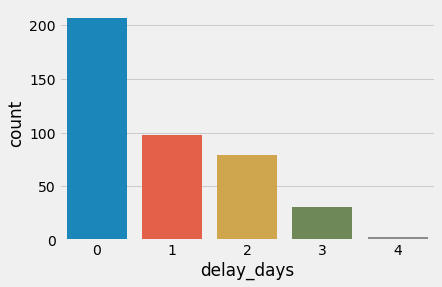

In [147]:
colors = sns.color_palette('pastel')
# sns.countplot(order_intern['delay_days']);
sns.countplot(data= order_intern, x = 'delay_days');


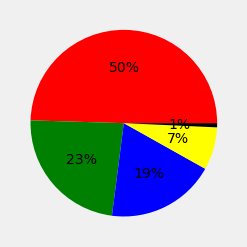

In [125]:

plt.pie(order_intern['delay_days'].value_counts(), colors=['red', 'green', 'blue', 'yellow', 'black'], autopct='%.0f%%');


In [120]:
mean_delay_intern = order_intern['delay_days'][order_intern['delay_days'] > 0].mean()
mean_delay_intern

1.7109004739336493

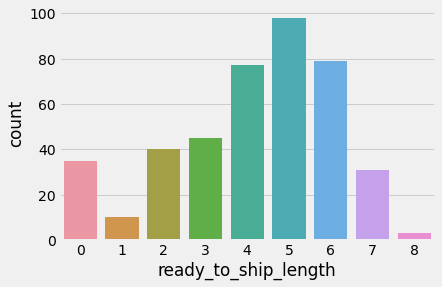

In [87]:

# order_intern['ready_to_ship_length'] = order_intern['ready_to_ship_length'].apply(lambda x: (x))
# order_intern['ready_to_ship_length'].plot(kind='hist')
sns.countplot(x=order_intern['ready_to_ship_length']);



In [ ]:
process.head()
process['on_truck_order_diff'] = process.on_truck_scan_date - process.order_date
process.sort_values('on_truck_order_diff')

In [ ]:
# correlation matrix between these variables
# corr_columns=["views", "likes", "dislikes", "comment_count", "trending_days_difference"]
# corr_mtrx=df[corr_columns].corr()
# corr_mtrx

In [ ]:
# draw the heatmap 
# plt.figure(figsize = (14,12))
# ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')